In [1]:
# Installing the libraries
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import warnings

In [3]:
# Importing functions from the above library
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Upload dataset - Alphabets_data.csv
#Reading our dataset
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# **01. Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
# Summary statistics
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
# Checking for null values
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


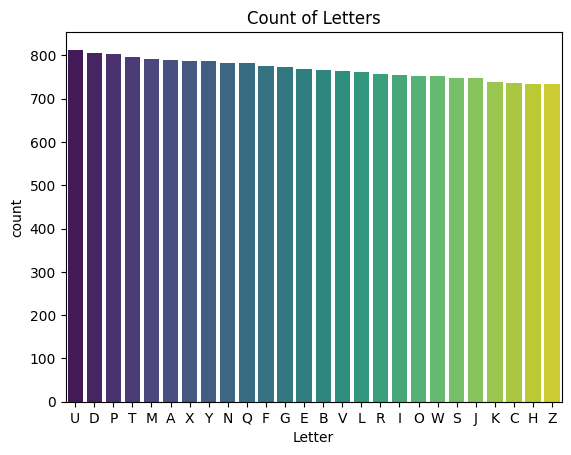

In [8]:
# Creating a count plot to visualize the count of letters
# Ordering them by the max frequency letter to the least frequency letter
sns.countplot(x='letter', data=df, order=df['letter'].value_counts().index, palette='viridis')
plt.title('Count of Letters')
plt.xlabel('Letter')
plt.show()

In [9]:
# Check for duplicate values
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [10]:
# Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


<Axes: >

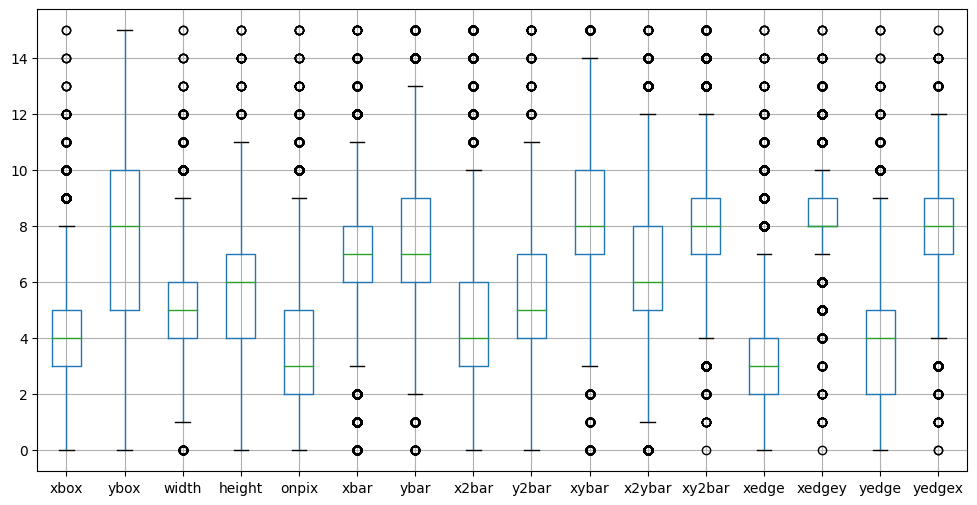

In [12]:
# Creating box plots to check for outliers
df.boxplot(figsize=(12,6))

In [13]:
# Performing Label Encoding on the categorical data
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [14]:
# treating the outlier
# Steps to remove outliers through inter quartile range (IQR)
# 1. Calculate the IQR
# 2. Define the lower and upper bound
# 3. Filter the DataFrame

In [15]:
# Calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Filter the DataFrame to remove outliers
# Any value that falls below lower bound or above upper bound are outliers
# ~ sign is used to negate the boolean sign as [df < lower_bound] OR [df > upper_bound] give true values
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape, df_out.shape

((18668, 17), (11228, 17))

In [16]:
df_out

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,14,4,3,5,4,2,7,6,8,8,6,5,7,3,8,4,8
19992,4,4,9,5,6,3,5,9,2,10,10,8,9,2,8,5,5
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7


<Axes: >

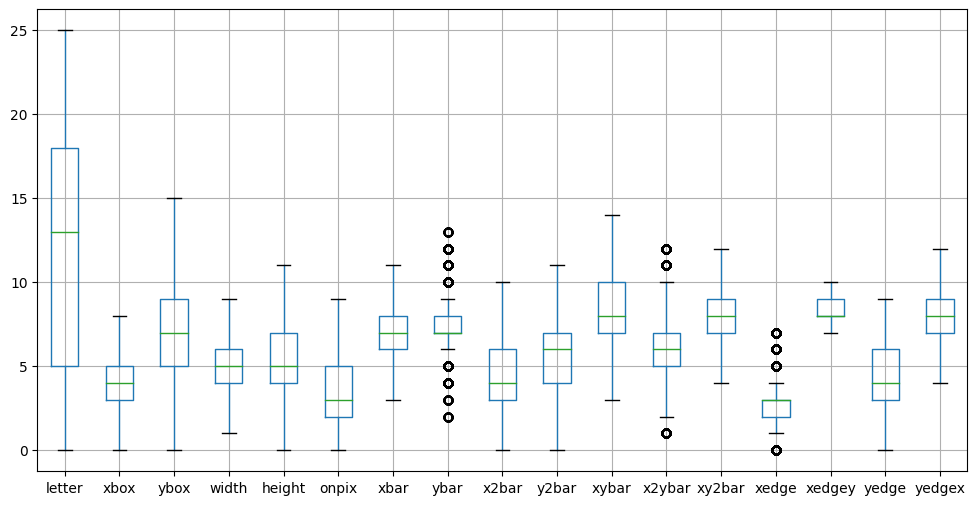

In [17]:
# Creating box plots to check for outliers
df_out.boxplot(figsize=(12,6))

In [18]:
# Splittting the data into target variable and independant variable
x = df_out.drop('letter', axis=1)
y = df_out['letter']

In [19]:
# Standardizing the x values
sc = StandardScaler()
x_sc = sc.fit_transform(x)

# **02. Building Model**

In [20]:
# Splitting the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

In [29]:
# create model by building a user defined function
def create_model():
    model = Sequential() #class of keras that allows to build a model layer by layer
    # 1st layer has 64 neurons (an arbitrary value), with input being x_train.shape[1] for the no. of dimensions in the training dataset,
    # the kernels/weight are initialised using a set range for random uniform, activation function used relu
    model.add(Dense(64, input_dim=x_train.shape[1], kernel_initializer='random_uniform', activation='relu'))
    # 2nd layer has 32 neurons (following funnel approach of reduction), the kernels/weight are initialised using a set range for random uniform, activation function used relu
    model.add(Dense(32, kernel_initializer='random_uniform', activation='relu'))
    # 3rd layer has len(np.unique(y)) neuron (as many neurons as unique classes present in y),
    # the kernels/weight are initialised using a set range for random uniform,
    # activation function used is softmax activation function, which is suitable for multi-class classification problems.
    model.add(Dense(len(np.unique(y)), kernel_initializer='random_uniform', activation='softmax'))
    # Compile the model
    # Adam optimiser is a more stable one and leads to faster convergence of loss function
    adam=Adam(lr=0.01)
    # We must specify the loss function to use to evaluate a set of weights,
    # the optimizer is used to search through different weights for the network -
    # accurarcy metrics helps to collect and report the performance of the model during training.
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [30]:
# Initialize the model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, validation_split=0.20, verbose=0)

In [31]:
# Train the model
history = model.fit(x_train, y_train)

In [32]:
# Make predictions on the test set
y_pred = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [33]:
# Calculate the accuracy before hyperparameter tuning
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy before hyperparameter tuning: {accuracy:.4f}")

Accuracy before hyperparameter tuning: 0.8722


# **03. Tuning of Hyperparameters**

#### Tuning of Hyperparameters:- Learning Rate and Drop out rate

In [37]:
# Defining the model to indentify best learning rate and drop out rate

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(64,input_dim = x_train.shape[1],kernel_initializer = 'random_uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, kernel_initializer = 'random_uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)),activation = 'softmax'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model1 = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 10, epochs = 20, validation_split=0.20)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.868 total time=  42.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=  21.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.887 total time=  42.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.881 total time=  23.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.897 total time=  25.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.869 total time=  35.7s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.883 total time=  35.3s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.885 total time=  42.7s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.898 total time=  42.4s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.896 total time=  42.1s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.873 total time=  25.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.886 total time=  22.8s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.893 total time=  42.5s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.888 total time=  41.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.893 total time=  42.2s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.855 total time=  23.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.859 total time=  24.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.868 total time=  23.1s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.857 total time=  42.1s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.876 total time=  42.2s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.848 total time=  42.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.860 total time=  42.6s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.863 total time=  22.7s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.872 total time=  42.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.866 total time=  24.9s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.844 total time=  24.5s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.863 total time=  42.2s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.858 total time=  42.1s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.860 total time=  23.9s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.869 total time=  23.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.834 total time=  23.0s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.814 total time=  22.8s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.832 total time=  42.2s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.836 total time=  22.5s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.852 total time=  23.6s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.826 total time=  42.2s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.819 total time=  23.0s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.830 total time=  42.2s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.844 total time=  26.0s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.857 total time=  42.6s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.832 total time=  42.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.827 total time=  42.1s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.830 total time=  23.6s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.843 total time=  42.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.832 total time=  23.4s


In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.886552381515503, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8832126140594483,0.009334762451955206 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8862191677093506,0.010498494409857237 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.886552381515503,0.0072109841361617626 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8630608677864074,0.008027898599301997 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8618364810943604,0.007884095965531968 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8584959864616394,0.008260167178952772 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8335581660270691,0.012362675465216329 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8351175546646118,0.013815141210895079 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8328887224197388,0.005403065909701635 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Using the above tuned Learning rate = 0.1 and drop out rate = 0.0 we tune the rest of the hyperparameters

#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [39]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(64,input_dim = x_train.shape[1],kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(32, kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(len(np.unique(y)),activation = 'softmax'))

    adam = Adam(lr = 0.1)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 10, epochs = 20, validation_split=0.20)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear','sigmoid']
init = ['uniform','normal','zero','random_uniform']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model2,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/20] END activation_function=softmax, init=uniform;, score=0.482 total time=  29.3s
[CV 2/5; 1/20] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/20] END activation_function=softmax, init=uniform;, score=0.357 total time=  42.9s
[CV 3/5; 1/20] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/20] END activation_function=softmax, init=uniform;, score=0.488 total time=  42.2s
[CV 4/5; 1/20] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/20] END activation_function=softmax, init=uniform;, score=0.467 total time=  25.5s
[CV 5/5; 1/20] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/20] END activation_function=softmax, init=uniform;, score=0.417 total time=  23.8s
[CV 1/5; 2/20] START activation_function=softmax, init=normal...................


[CV 1/5; 2/20] END activation_function=softmax, init=normal;, score=0.439 total time=  28.4s
[CV 2/5; 2/20] START activation_function=softmax, init=normal...................


[CV 2/5; 2/20] END activation_function=softmax, init=normal;, score=0.459 total time=  29.4s
[CV 3/5; 2/20] START activation_function=softmax, init=normal...................


[CV 3/5; 2/20] END activation_function=softmax, init=normal;, score=0.429 total time=  38.4s
[CV 4/5; 2/20] START activation_function=softmax, init=normal...................


[CV 4/5; 2/20] END activation_function=softmax, init=normal;, score=0.420 total time=  44.3s
[CV 5/5; 2/20] START activation_function=softmax, init=normal...................


[CV 5/5; 2/20] END activation_function=softmax, init=normal;, score=0.442 total time=  38.0s
[CV 1/5; 3/20] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/20] END activation_function=softmax, init=zero;, score=0.056 total time=  24.1s
[CV 2/5; 3/20] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/20] END activation_function=softmax, init=zero;, score=0.047 total time=  42.2s
[CV 3/5; 3/20] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/20] END activation_function=softmax, init=zero;, score=0.061 total time=  23.6s
[CV 4/5; 3/20] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/20] END activation_function=softmax, init=zero;, score=0.056 total time=  42.2s
[CV 5/5; 3/20] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/20] END activation_function=softmax, init=zero;, score=0.055 total time=  24.0s
[CV 1/5; 4/20] START activation_function=softmax, init=random_uniform...........
[CV 1/5; 4/20] END activation_function=softmax, init=random_uniform;, score=0.447 total time=  24.4s
[CV 2/5; 4/20] START activation_function=softmax, init=random_uniform...........


[CV 2/5; 4/20] END activation_function=softmax, init=random_uniform;, score=0.447 total time=  26.3s
[CV 3/5; 4/20] START activation_function=softmax, init=random_uniform...........


[CV 3/5; 4/20] END activation_function=softmax, init=random_uniform;, score=0.464 total time=  23.7s
[CV 4/5; 4/20] START activation_function=softmax, init=random_uniform...........


[CV 4/5; 4/20] END activation_function=softmax, init=random_uniform;, score=0.492 total time=  23.0s
[CV 5/5; 4/20] START activation_function=softmax, init=random_uniform...........


[CV 5/5; 4/20] END activation_function=softmax, init=random_uniform;, score=0.453 total time=  22.5s
[CV 1/5; 5/20] START activation_function=relu, init=uniform.....................


[CV 1/5; 5/20] END activation_function=relu, init=uniform;, score=0.870 total time=  24.4s
[CV 2/5; 5/20] START activation_function=relu, init=uniform.....................


[CV 2/5; 5/20] END activation_function=relu, init=uniform;, score=0.875 total time=  42.1s
[CV 3/5; 5/20] START activation_function=relu, init=uniform.....................


[CV 3/5; 5/20] END activation_function=relu, init=uniform;, score=0.882 total time=  22.6s
[CV 4/5; 5/20] START activation_function=relu, init=uniform.....................


[CV 4/5; 5/20] END activation_function=relu, init=uniform;, score=0.879 total time=  43.1s
[CV 5/5; 5/20] START activation_function=relu, init=uniform.....................


[CV 5/5; 5/20] END activation_function=relu, init=uniform;, score=0.899 total time=  23.3s
[CV 1/5; 6/20] START activation_function=relu, init=normal......................


[CV 1/5; 6/20] END activation_function=relu, init=normal;, score=0.867 total time=  42.1s
[CV 2/5; 6/20] START activation_function=relu, init=normal......................


[CV 2/5; 6/20] END activation_function=relu, init=normal;, score=0.889 total time=  42.2s
[CV 3/5; 6/20] START activation_function=relu, init=normal......................


[CV 3/5; 6/20] END activation_function=relu, init=normal;, score=0.873 total time=  42.2s
[CV 4/5; 6/20] START activation_function=relu, init=normal......................


[CV 4/5; 6/20] END activation_function=relu, init=normal;, score=0.900 total time=  42.2s
[CV 5/5; 6/20] START activation_function=relu, init=normal......................


[CV 5/5; 6/20] END activation_function=relu, init=normal;, score=0.904 total time=  42.2s
[CV 1/5; 7/20] START activation_function=relu, init=zero........................


[CV 1/5; 7/20] END activation_function=relu, init=zero;, score=0.057 total time=  22.0s
[CV 2/5; 7/20] START activation_function=relu, init=zero........................


[CV 2/5; 7/20] END activation_function=relu, init=zero;, score=0.055 total time=  23.0s
[CV 3/5; 7/20] START activation_function=relu, init=zero........................


[CV 3/5; 7/20] END activation_function=relu, init=zero;, score=0.061 total time=  23.1s
[CV 4/5; 7/20] START activation_function=relu, init=zero........................


[CV 4/5; 7/20] END activation_function=relu, init=zero;, score=0.056 total time=  21.9s
[CV 5/5; 7/20] START activation_function=relu, init=zero........................


[CV 5/5; 7/20] END activation_function=relu, init=zero;, score=0.055 total time=  32.2s
[CV 1/5; 8/20] START activation_function=relu, init=random_uniform..............


[CV 1/5; 8/20] END activation_function=relu, init=random_uniform;, score=0.873 total time=  42.1s
[CV 2/5; 8/20] START activation_function=relu, init=random_uniform..............


[CV 2/5; 8/20] END activation_function=relu, init=random_uniform;, score=0.889 total time=  23.2s
[CV 3/5; 8/20] START activation_function=relu, init=random_uniform..............


[CV 3/5; 8/20] END activation_function=relu, init=random_uniform;, score=0.867 total time=  22.9s
[CV 4/5; 8/20] START activation_function=relu, init=random_uniform..............


[CV 4/5; 8/20] END activation_function=relu, init=random_uniform;, score=0.888 total time=  24.4s
[CV 5/5; 8/20] START activation_function=relu, init=random_uniform..............


[CV 5/5; 8/20] END activation_function=relu, init=random_uniform;, score=0.901 total time=  42.3s
[CV 1/5; 9/20] START activation_function=tanh, init=uniform.....................


[CV 1/5; 9/20] END activation_function=tanh, init=uniform;, score=0.871 total time=  22.5s
[CV 2/5; 9/20] START activation_function=tanh, init=uniform.....................


[CV 2/5; 9/20] END activation_function=tanh, init=uniform;, score=0.873 total time=  22.8s
[CV 3/5; 9/20] START activation_function=tanh, init=uniform.....................


[CV 3/5; 9/20] END activation_function=tanh, init=uniform;, score=0.871 total time=  42.2s
[CV 4/5; 9/20] START activation_function=tanh, init=uniform.....................


[CV 4/5; 9/20] END activation_function=tanh, init=uniform;, score=0.879 total time=  42.2s
[CV 5/5; 9/20] START activation_function=tanh, init=uniform.....................


[CV 5/5; 9/20] END activation_function=tanh, init=uniform;, score=0.891 total time=  22.7s
[CV 1/5; 10/20] START activation_function=tanh, init=normal.....................


[CV 1/5; 10/20] END activation_function=tanh, init=normal;, score=0.865 total time=  42.3s
[CV 2/5; 10/20] START activation_function=tanh, init=normal.....................


[CV 2/5; 10/20] END activation_function=tanh, init=normal;, score=0.874 total time=  27.9s
[CV 3/5; 10/20] START activation_function=tanh, init=normal.....................


[CV 3/5; 10/20] END activation_function=tanh, init=normal;, score=0.870 total time=  22.1s
[CV 4/5; 10/20] START activation_function=tanh, init=normal.....................


[CV 4/5; 10/20] END activation_function=tanh, init=normal;, score=0.880 total time=  23.2s
[CV 5/5; 10/20] START activation_function=tanh, init=normal.....................


[CV 5/5; 10/20] END activation_function=tanh, init=normal;, score=0.894 total time=  42.8s
[CV 1/5; 11/20] START activation_function=tanh, init=zero.......................


[CV 1/5; 11/20] END activation_function=tanh, init=zero;, score=0.056 total time=  23.3s
[CV 2/5; 11/20] START activation_function=tanh, init=zero.......................


[CV 2/5; 11/20] END activation_function=tanh, init=zero;, score=0.047 total time=  42.0s
[CV 3/5; 11/20] START activation_function=tanh, init=zero.......................


[CV 3/5; 11/20] END activation_function=tanh, init=zero;, score=0.061 total time=  42.2s
[CV 4/5; 11/20] START activation_function=tanh, init=zero.......................


[CV 4/5; 11/20] END activation_function=tanh, init=zero;, score=0.065 total time=  22.7s
[CV 5/5; 11/20] START activation_function=tanh, init=zero.......................


[CV 5/5; 11/20] END activation_function=tanh, init=zero;, score=0.055 total time=  24.0s
[CV 1/5; 12/20] START activation_function=tanh, init=random_uniform.............


[CV 1/5; 12/20] END activation_function=tanh, init=random_uniform;, score=0.863 total time=  42.1s
[CV 2/5; 12/20] START activation_function=tanh, init=random_uniform.............


[CV 2/5; 12/20] END activation_function=tanh, init=random_uniform;, score=0.868 total time=  22.9s
[CV 3/5; 12/20] START activation_function=tanh, init=random_uniform.............


[CV 3/5; 12/20] END activation_function=tanh, init=random_uniform;, score=0.874 total time=  42.2s
[CV 4/5; 12/20] START activation_function=tanh, init=random_uniform.............


[CV 4/5; 12/20] END activation_function=tanh, init=random_uniform;, score=0.881 total time=  42.2s
[CV 5/5; 12/20] START activation_function=tanh, init=random_uniform.............


[CV 5/5; 12/20] END activation_function=tanh, init=random_uniform;, score=0.885 total time=  22.8s
[CV 1/5; 13/20] START activation_function=linear, init=uniform..................


[CV 1/5; 13/20] END activation_function=linear, init=uniform;, score=0.720 total time=  42.2s
[CV 2/5; 13/20] START activation_function=linear, init=uniform..................


[CV 2/5; 13/20] END activation_function=linear, init=uniform;, score=0.749 total time=  21.5s
[CV 3/5; 13/20] START activation_function=linear, init=uniform..................


[CV 3/5; 13/20] END activation_function=linear, init=uniform;, score=0.736 total time=  23.8s
[CV 4/5; 13/20] START activation_function=linear, init=uniform..................


[CV 4/5; 13/20] END activation_function=linear, init=uniform;, score=0.737 total time=  42.3s
[CV 5/5; 13/20] START activation_function=linear, init=uniform..................


[CV 5/5; 13/20] END activation_function=linear, init=uniform;, score=0.757 total time=  26.6s
[CV 1/5; 14/20] START activation_function=linear, init=normal...................


[CV 1/5; 14/20] END activation_function=linear, init=normal;, score=0.744 total time=  26.5s
[CV 2/5; 14/20] START activation_function=linear, init=normal...................


[CV 2/5; 14/20] END activation_function=linear, init=normal;, score=0.762 total time=  42.3s
[CV 3/5; 14/20] START activation_function=linear, init=normal...................


[CV 3/5; 14/20] END activation_function=linear, init=normal;, score=0.758 total time=  26.9s
[CV 4/5; 14/20] START activation_function=linear, init=normal...................


[CV 4/5; 14/20] END activation_function=linear, init=normal;, score=0.734 total time=  27.4s
[CV 5/5; 14/20] START activation_function=linear, init=normal...................


[CV 5/5; 14/20] END activation_function=linear, init=normal;, score=0.753 total time=  42.8s
[CV 1/5; 15/20] START activation_function=linear, init=zero.....................


[CV 1/5; 15/20] END activation_function=linear, init=zero;, score=0.057 total time=  26.9s
[CV 2/5; 15/20] START activation_function=linear, init=zero.....................


[CV 2/5; 15/20] END activation_function=linear, init=zero;, score=0.047 total time=  25.3s
[CV 3/5; 15/20] START activation_function=linear, init=zero.....................


[CV 3/5; 15/20] END activation_function=linear, init=zero;, score=0.061 total time=  42.3s
[CV 4/5; 15/20] START activation_function=linear, init=zero.....................


[CV 4/5; 15/20] END activation_function=linear, init=zero;, score=0.056 total time=  42.2s
[CV 5/5; 15/20] START activation_function=linear, init=zero.....................


[CV 5/5; 15/20] END activation_function=linear, init=zero;, score=0.055 total time=  42.6s
[CV 1/5; 16/20] START activation_function=linear, init=random_uniform...........


[CV 1/5; 16/20] END activation_function=linear, init=random_uniform;, score=0.722 total time=  42.6s
[CV 2/5; 16/20] START activation_function=linear, init=random_uniform...........


[CV 2/5; 16/20] END activation_function=linear, init=random_uniform;, score=0.757 total time=  23.6s
[CV 3/5; 16/20] START activation_function=linear, init=random_uniform...........


[CV 3/5; 16/20] END activation_function=linear, init=random_uniform;, score=0.743 total time=  42.1s
[CV 4/5; 16/20] START activation_function=linear, init=random_uniform...........


[CV 4/5; 16/20] END activation_function=linear, init=random_uniform;, score=0.742 total time=  22.6s
[CV 5/5; 16/20] START activation_function=linear, init=random_uniform...........


[CV 5/5; 16/20] END activation_function=linear, init=random_uniform;, score=0.761 total time=  42.1s
[CV 1/5; 17/20] START activation_function=sigmoid, init=uniform.................


[CV 1/5; 17/20] END activation_function=sigmoid, init=uniform;, score=0.752 total time=  42.2s
[CV 2/5; 17/20] START activation_function=sigmoid, init=uniform.................


[CV 2/5; 17/20] END activation_function=sigmoid, init=uniform;, score=0.756 total time=  42.3s
[CV 3/5; 17/20] START activation_function=sigmoid, init=uniform.................


[CV 3/5; 17/20] END activation_function=sigmoid, init=uniform;, score=0.769 total time=  21.7s
[CV 4/5; 17/20] START activation_function=sigmoid, init=uniform.................


[CV 4/5; 17/20] END activation_function=sigmoid, init=uniform;, score=0.767 total time=  42.2s
[CV 5/5; 17/20] START activation_function=sigmoid, init=uniform.................


[CV 5/5; 17/20] END activation_function=sigmoid, init=uniform;, score=0.776 total time=  42.1s
[CV 1/5; 18/20] START activation_function=sigmoid, init=normal..................


[CV 1/5; 18/20] END activation_function=sigmoid, init=normal;, score=0.767 total time=  24.6s
[CV 2/5; 18/20] START activation_function=sigmoid, init=normal..................


[CV 2/5; 18/20] END activation_function=sigmoid, init=normal;, score=0.742 total time=  42.1s
[CV 3/5; 18/20] START activation_function=sigmoid, init=normal..................


[CV 3/5; 18/20] END activation_function=sigmoid, init=normal;, score=0.774 total time=  42.2s
[CV 4/5; 18/20] START activation_function=sigmoid, init=normal..................


[CV 4/5; 18/20] END activation_function=sigmoid, init=normal;, score=0.771 total time=  42.6s
[CV 5/5; 18/20] START activation_function=sigmoid, init=normal..................


[CV 5/5; 18/20] END activation_function=sigmoid, init=normal;, score=0.771 total time=  42.2s
[CV 1/5; 19/20] START activation_function=sigmoid, init=zero....................


[CV 1/5; 19/20] END activation_function=sigmoid, init=zero;, score=0.171 total time=  25.6s
[CV 2/5; 19/20] START activation_function=sigmoid, init=zero....................


[CV 2/5; 19/20] END activation_function=sigmoid, init=zero;, score=0.167 total time=  25.1s
[CV 3/5; 19/20] START activation_function=sigmoid, init=zero....................


[CV 3/5; 19/20] END activation_function=sigmoid, init=zero;, score=0.179 total time=  42.2s
[CV 4/5; 19/20] START activation_function=sigmoid, init=zero....................


[CV 4/5; 19/20] END activation_function=sigmoid, init=zero;, score=0.218 total time=  22.3s
[CV 5/5; 19/20] START activation_function=sigmoid, init=zero....................


[CV 5/5; 19/20] END activation_function=sigmoid, init=zero;, score=0.185 total time=  42.0s
[CV 1/5; 20/20] START activation_function=sigmoid, init=random_uniform..........


[CV 1/5; 20/20] END activation_function=sigmoid, init=random_uniform;, score=0.750 total time=  42.2s
[CV 2/5; 20/20] START activation_function=sigmoid, init=random_uniform..........


[CV 2/5; 20/20] END activation_function=sigmoid, init=random_uniform;, score=0.756 total time=  22.8s
[CV 3/5; 20/20] START activation_function=sigmoid, init=random_uniform..........


[CV 3/5; 20/20] END activation_function=sigmoid, init=random_uniform;, score=0.778 total time=  42.2s
[CV 4/5; 20/20] START activation_function=sigmoid, init=random_uniform..........


[CV 4/5; 20/20] END activation_function=sigmoid, init=random_uniform;, score=0.775 total time=  22.6s
[CV 5/5; 20/20] START activation_function=sigmoid, init=random_uniform..........


[CV 5/5; 20/20] END activation_function=sigmoid, init=random_uniform;, score=0.771 total time=  42.2s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8865528225898742, using {'activation_function': 'relu', 'init': 'normal'}
0.44200015664100645,0.04937467984005235 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.43753930926322937,0.012961770799335132 with: {'activation_function': 'softmax', 'init': 'normal'}
0.054999671131372455,0.004550326694641568 with: {'activation_function': 'softmax', 'init': 'zero'}
0.4607021987438202,0.016889364893157455 with: {'activation_function': 'softmax', 'init': 'random_uniform'}
0.881097424030304,0.009883131237953835 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8865528225898742,0.014537086265738387 with: {'activation_function': 'relu', 'init': 'normal'}
0.05678041726350784,0.0021754199020564695 with: {'activation_function': 'relu', 'init': 'zero'}
0.8834340929985046,0.012067369633983064 with: {'activation_function': 'relu', 'init': 'random_uniform'}
0.8770886301994324,0.00776364732862585 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8765323996543884,0.00

Using the above tuned

Learning rate = 0.1 and drop out rate = 0.0,

Activation function = 'relu' and kernel initializer = 'normal'

we tune the rest of the hyperparameters

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [41]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = x_train.shape[1],kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(len(np.unique(y)),activation = 'softmax'))

    adam = Adam(lr = 0.1)
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model3 = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 10, epochs = 20, validation_split=0.20)

# Define the grid search parameters

neuron1 = [16,32,64]
neuron2 = [8,16,32]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model3,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.745 total time=  23.6s
[CV 2/5; 1/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.732 total time=  22.9s
[CV 3/5; 1/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.719 total time=  42.2s
[CV 4/5; 1/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.734 total time=  23.2s
[CV 5/5; 1/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.748 total time=  23.0s
[CV 1/5; 2/9] START neuron1=16, neuron2=16......................................


[CV 1/5; 2/9] END .......neuron1=16, neuron2=16;, score=0.762 total time=  22.4s
[CV 2/5; 2/9] START neuron1=16, neuron2=16......................................


[CV 2/5; 2/9] END .......neuron1=16, neuron2=16;, score=0.769 total time=  22.2s
[CV 3/5; 2/9] START neuron1=16, neuron2=16......................................


[CV 3/5; 2/9] END .......neuron1=16, neuron2=16;, score=0.776 total time=  23.1s
[CV 4/5; 2/9] START neuron1=16, neuron2=16......................................


[CV 4/5; 2/9] END .......neuron1=16, neuron2=16;, score=0.774 total time=  42.5s
[CV 5/5; 2/9] START neuron1=16, neuron2=16......................................


[CV 5/5; 2/9] END .......neuron1=16, neuron2=16;, score=0.787 total time=  33.2s
[CV 1/5; 3/9] START neuron1=16, neuron2=32......................................


[CV 1/5; 3/9] END .......neuron1=16, neuron2=32;, score=0.795 total time=  42.5s
[CV 2/5; 3/9] START neuron1=16, neuron2=32......................................


[CV 2/5; 3/9] END .......neuron1=16, neuron2=32;, score=0.811 total time=  42.8s
[CV 3/5; 3/9] START neuron1=16, neuron2=32......................................


[CV 3/5; 3/9] END .......neuron1=16, neuron2=32;, score=0.815 total time=  38.0s
[CV 4/5; 3/9] START neuron1=16, neuron2=32......................................


[CV 4/5; 3/9] END .......neuron1=16, neuron2=32;, score=0.811 total time=  38.9s
[CV 5/5; 3/9] START neuron1=16, neuron2=32......................................


[CV 5/5; 3/9] END .......neuron1=16, neuron2=32;, score=0.814 total time=  42.4s
[CV 1/5; 4/9] START neuron1=32, neuron2=8.......................................


[CV 1/5; 4/9] END ........neuron1=32, neuron2=8;, score=0.717 total time=  42.9s
[CV 2/5; 4/9] START neuron1=32, neuron2=8.......................................


[CV 2/5; 4/9] END ........neuron1=32, neuron2=8;, score=0.770 total time=  41.0s
[CV 3/5; 4/9] START neuron1=32, neuron2=8.......................................


[CV 3/5; 4/9] END ........neuron1=32, neuron2=8;, score=0.757 total time=  35.0s
[CV 4/5; 4/9] START neuron1=32, neuron2=8.......................................


[CV 4/5; 4/9] END ........neuron1=32, neuron2=8;, score=0.769 total time=  37.5s
[CV 5/5; 4/9] START neuron1=32, neuron2=8.......................................


[CV 5/5; 4/9] END ........neuron1=32, neuron2=8;, score=0.788 total time=  38.0s
[CV 1/5; 5/9] START neuron1=32, neuron2=16......................................


[CV 1/5; 5/9] END .......neuron1=32, neuron2=16;, score=0.824 total time=  36.5s
[CV 2/5; 5/9] START neuron1=32, neuron2=16......................................


[CV 2/5; 5/9] END .......neuron1=32, neuron2=16;, score=0.819 total time=  42.4s
[CV 3/5; 5/9] START neuron1=32, neuron2=16......................................


[CV 3/5; 5/9] END .......neuron1=32, neuron2=16;, score=0.827 total time=  42.6s
[CV 4/5; 5/9] START neuron1=32, neuron2=16......................................


[CV 4/5; 5/9] END .......neuron1=32, neuron2=16;, score=0.829 total time=  36.2s
[CV 5/5; 5/9] START neuron1=32, neuron2=16......................................


[CV 5/5; 5/9] END .......neuron1=32, neuron2=16;, score=0.839 total time=  34.9s
[CV 1/5; 6/9] START neuron1=32, neuron2=32......................................


[CV 1/5; 6/9] END .......neuron1=32, neuron2=32;, score=0.845 total time=  45.4s
[CV 2/5; 6/9] START neuron1=32, neuron2=32......................................


[CV 2/5; 6/9] END .......neuron1=32, neuron2=32;, score=0.854 total time=  41.2s
[CV 3/5; 6/9] START neuron1=32, neuron2=32......................................


[CV 3/5; 6/9] END .......neuron1=32, neuron2=32;, score=0.861 total time=  40.3s
[CV 4/5; 6/9] START neuron1=32, neuron2=32......................................


[CV 4/5; 6/9] END .......neuron1=32, neuron2=32;, score=0.863 total time=  41.7s
[CV 5/5; 6/9] START neuron1=32, neuron2=32......................................


[CV 5/5; 6/9] END .......neuron1=32, neuron2=32;, score=0.885 total time=  42.5s
[CV 1/5; 7/9] START neuron1=64, neuron2=8.......................................


[CV 1/5; 7/9] END ........neuron1=64, neuron2=8;, score=0.798 total time=  42.7s
[CV 2/5; 7/9] START neuron1=64, neuron2=8.......................................


[CV 2/5; 7/9] END ........neuron1=64, neuron2=8;, score=0.814 total time= 1.4min
[CV 3/5; 7/9] START neuron1=64, neuron2=8.......................................


[CV 3/5; 7/9] END ........neuron1=64, neuron2=8;, score=0.816 total time= 1.4min
[CV 4/5; 7/9] START neuron1=64, neuron2=8.......................................


[CV 4/5; 7/9] END ........neuron1=64, neuron2=8;, score=0.803 total time= 1.4min
[CV 5/5; 7/9] START neuron1=64, neuron2=8.......................................


[CV 5/5; 7/9] END ........neuron1=64, neuron2=8;, score=0.812 total time=  50.4s
[CV 1/5; 8/9] START neuron1=64, neuron2=16......................................


[CV 1/5; 8/9] END .......neuron1=64, neuron2=16;, score=0.853 total time= 1.4min
[CV 2/5; 8/9] START neuron1=64, neuron2=16......................................


[CV 2/5; 8/9] END .......neuron1=64, neuron2=16;, score=0.854 total time=  42.9s
[CV 3/5; 8/9] START neuron1=64, neuron2=16......................................


[CV 3/5; 8/9] END .......neuron1=64, neuron2=16;, score=0.860 total time=  30.3s
[CV 4/5; 8/9] START neuron1=64, neuron2=16......................................


[CV 4/5; 8/9] END .......neuron1=64, neuron2=16;, score=0.863 total time=  42.6s
[CV 5/5; 8/9] START neuron1=64, neuron2=16......................................


[CV 5/5; 8/9] END .......neuron1=64, neuron2=16;, score=0.870 total time=  27.4s
[CV 1/5; 9/9] START neuron1=64, neuron2=32......................................


[CV 1/5; 9/9] END .......neuron1=64, neuron2=32;, score=0.874 total time=  25.3s
[CV 2/5; 9/9] START neuron1=64, neuron2=32......................................


[CV 2/5; 9/9] END .......neuron1=64, neuron2=32;, score=0.880 total time=  28.3s
[CV 3/5; 9/9] START neuron1=64, neuron2=32......................................


[CV 3/5; 9/9] END .......neuron1=64, neuron2=32;, score=0.885 total time=  22.6s
[CV 4/5; 9/9] START neuron1=64, neuron2=32......................................


[CV 4/5; 9/9] END .......neuron1=64, neuron2=32;, score=0.889 total time=  21.4s
[CV 5/5; 9/9] START neuron1=64, neuron2=32......................................


[CV 5/5; 9/9] END .......neuron1=64, neuron2=32;, score=0.909 total time=  42.4s


In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8871098518371582, using {'neuron1': 64, 'neuron2': 32}
0.735581636428833,0.010359908649664226 with: {'neuron1': 16, 'neuron2': 8}
0.7738829016685486,0.008262013694853977 with: {'neuron1': 16, 'neuron2': 16}
0.809286642074585,0.00722471390790019 with: {'neuron1': 16, 'neuron2': 32}
0.7603020668029785,0.023677275960137526 with: {'neuron1': 32, 'neuron2': 8}
0.8274339199066162,0.006389806611051496 with: {'neuron1': 32, 'neuron2': 16}
0.8617261052131653,0.01330283029035924 with: {'neuron1': 32, 'neuron2': 32}
0.8086178660392761,0.006757044441396426 with: {'neuron1': 64, 'neuron2': 8}
0.8598322153091431,0.006189975725050968 with: {'neuron1': 64, 'neuron2': 16}
0.8871098518371582,0.01189384449045976 with: {'neuron1': 64, 'neuron2': 32}


In [43]:
# Similarly we can also tune for no. of epochs and batch size.

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once.

But This process is computationally expensive.

In [44]:
# Using the above tuned hyperparameters, let us build the final model.

# **04. Tuned Model**

Using the above tuned

Learning rate = 0.1 and drop out rate = 0.0,

Activation function = 'relu' and kernel initializer = 'normal'

neuron1 = 64 and neuron2 = 32

In [45]:
def create_model():
    model4 = Sequential()
    model4.add(Dense(64, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
    model4.add(Dropout(0.0))
    model4.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model4.add(Dropout(0.0))
    model4.add(Dense(len(np.unique(y)), kernel_initializer='normal', activation='softmax'))
    adam=Adam(lr=0.1)
    model4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model4

In [46]:
# Initialize the model
model4 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, validation_split=0.20, verbose=0)

In [47]:
# Train the model
history = model4.fit(x_train, y_train)

In [48]:
# Make predictions on the test set
y_pred = model4.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [49]:
# Calculate the accuracy after hyperparameter tuning
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after hyperparameter tuning: {accuracy:.4f}")

Accuracy after hyperparameter tuning: 0.8789


In [50]:
# Printing the classification report to findout all the metrics of the tuned model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.89      0.92      0.90       118
           2       0.82      0.94      0.88        65
           3       0.86      0.96      0.90       144
           4       0.92      0.92      0.92       108
           5       0.82      0.87      0.84       100
           6       0.92      0.90      0.91       123
           7       0.78      0.70      0.74        94
           8       0.87      0.89      0.88        94
           9       0.96      0.73      0.83        63
          10       0.94      0.83      0.88       119
          11       0.86      0.84      0.85        50
          12       0.00      0.00      0.00         2
          13       0.95      0.91      0.93        92
          14       0.90      0.95      0.93       106
          15       0.91      0.79      0.84        85
          16       0.99      0.90      0.95       134
          17       0.82    